In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time

Matplotlib created a temporary cache directory at C:\Users\Hp\AppData\Local\Temp\matplotlib-epprajlg because the default path (C:\Users\Hp\.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
def f(x,y):
    return (y)**2 + (x)**2 + 9

In [3]:
def df_dx(x,y) :
    return 2*(x)

def df_dy(x,y) :
    return 2*(y)

def d2f_dy2(x,y) :
    return 2

def d2f_dx2(x,y) :
    return 2
def d2f_dxdy(x,y) :
    return 0


In [4]:
def hess(x,y) :
    return np.array([[d2f_dx2(x,y) , d2f_dxdy(x,y)],
                      [d2f_dxdy(x,y) , d2f_dy2(x,y)]])

def grad(x,y) :
    return np.array([df_dx(x,y),df_dy(x,y)])

def hess_inv(x,y) :
    return np.linalg.inv(hess(x,y))

def sub_term(x,y) :
    return np.dot(hess_inv(x,y), np.transpose(grad(x,y)))



In [5]:
def L2Norm(x,y) :
    grad_x = df_dx(x,y);
    grad_y = df_dy(x,y);
    return np.sqrt(grad_x**2 + grad_y**2)


In [6]:
def gradient_descent(x_start , y_start ) :

    x = x_start
    y = y_start
    count = 0
    norm = L2Norm(x,y)
    TLevel = 10**(-15)

    start_time = time.time()

    while(norm > TLevel) :
        grad_x = df_dx(x,y)
        grad_y = df_dy(x,y)

        term_sub = sub_term(x,y)

        x = x - term_sub[0]
        y = y - term_sub[1]

        norm = L2Norm(x,y)
        count = count + 1
    
    end_time = time.time()
    elapsed_time = end_time - start_time

    print(f"Time taken: {elapsed_time} seconds")
    print(f"Iterations: {count}")
    print(x,y,f(x,y))
    
    return x,y,f(x,y)



In [7]:
x_range = np.arange(-150,150,0.1)
y_range = np.arange(-150,150,0.1)

X,Y = np.meshgrid(x_range,y_range)

Z = f(X,Y)

x_start , y_start = 1000 , -1000

x_dash ,y_dash ,f_dash = gradient_descent(x_start , y_start )


Time taken: 0.004439115524291992 seconds
Iterations: 1
0.0 0.0 9.0


In [8]:
print(f_dash)
print("Minimiser in x = ", x_dash)
print("Minimiser in y = ", y_dash)

9.0
Minimiser in x =  0.0
Minimiser in y =  0.0


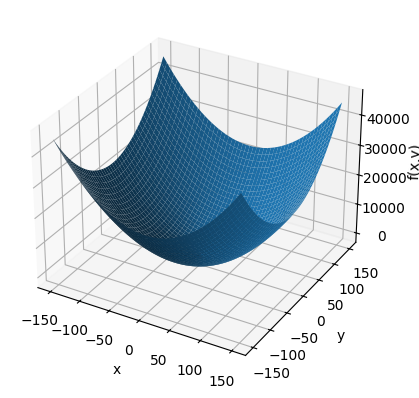

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X,Y,Z)
ax.scatter(x_dash,y_dash,f_dash, c='r', marker='.')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
plt.show()